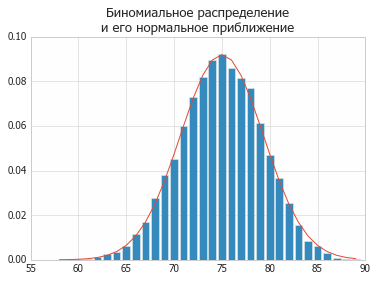

In [2]:
# -*- coding: utf-8 -*-
"""
Глава 6, рис. 4
"""

import math, random
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2  

def bernoulli_trial(p):
    return 1 if random.random() < p else 0
    
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    fig = plt.figure()
    
    data = [binomial(p, n) for _ in range(num_points)]
   
    # использовать столбиковую диаграмму для показа фактических биномиальных выборок
    histogram = Counter(data)
    
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8)  #, color='0.75'
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # использовать линейный график для показа нормального приближения
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Биномиальное распределение\nи его нормальное приближение", fontsize=13)
    plt.show()
    #fig.savefig("fig_6-4", dpi=300, bbox_inches='tight', facecolor='w') 
    
make_hist(0.75, 100, 10000) 